This is free hand experiment exploring what can be done with OpenCV. There is no particular goal other than exploring.

In [12]:
# pip install opencv-python

In [33]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import os

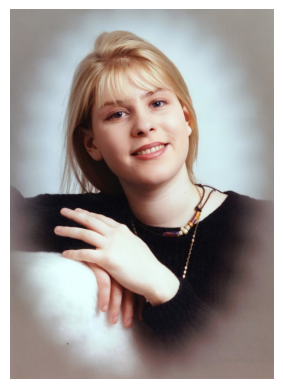

In [4]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB (OpenCV reads images in BGR format by default)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

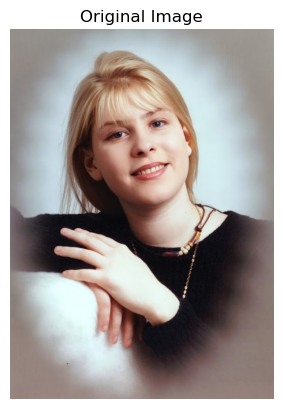

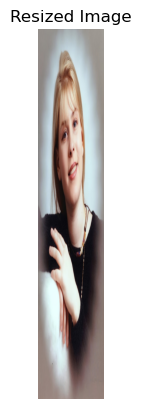

In [10]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Display the original image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

# Resize the image to half of its original size
resized_image = cv2.resize(image, None, fx=0.5, fy=2, interpolation=cv2.INTER_LINEAR)

# Display the resized image
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')
plt.show()

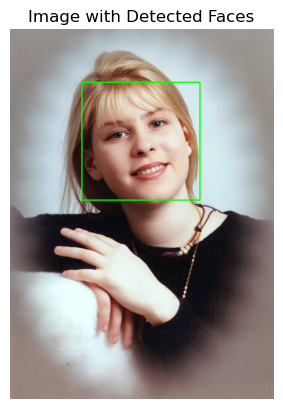

In [11]:
# Load the pre-trained Haar Cascade classifier for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image to grayscale for face detection
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the image
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the detected faces
for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Display the modified image with rectangles around the detected faces
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Image with Detected Faces')
plt.axis('off')
plt.show()

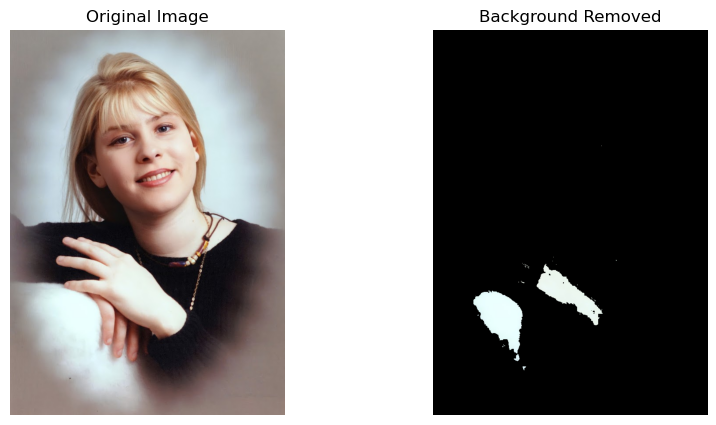

In [16]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary mask of the background
_, mask = cv2.threshold(gray, 240, 255, cv2.THRESH_BINARY_INV)

# Invert the mask to represent the foreground
mask = cv2.bitwise_not(mask)

# Apply the mask to the original image to remove the background
result = cv2.bitwise_and(image, image, mask=mask)

# Display the original image and the result (background removed)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Background Removed')
plt.axis('off')

plt.show()

Not what I expected. But what do I want for a first exploration?

To improve the accuracy of background removal and prevent excessive removal of the foreground object, we can use more sophisticated techniques. One such approach is using the GrabCut algorithm, which iteratively refines a segmentation mask based on user-provided foreground and background seeds.

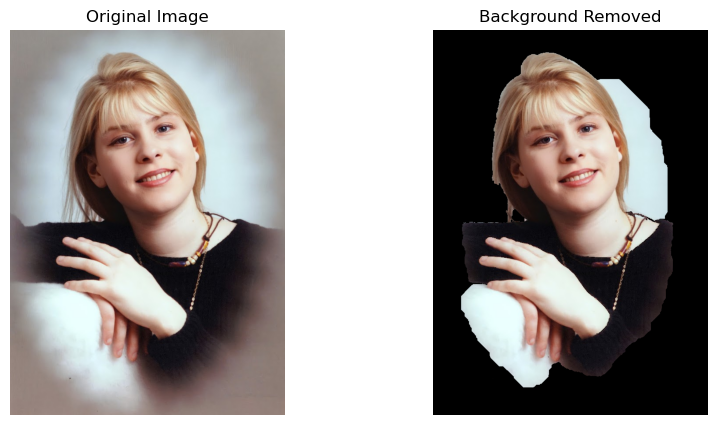

In [17]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Create a binary mask initialized with zeros
mask = np.zeros(image.shape[:2], np.uint8)

# Define the background and foreground models
bgd_model = np.zeros((1, 65), np.float64)
fgd_model = np.zeros((1, 65), np.float64)

# Define a rectangle encompassing the foreground object
# (You may need to adjust the coordinates based on the specific image)
rect = (50, 50, image.shape[1] - 100, image.shape[0] - 100)

# Apply GrabCut algorithm to refine the mask
cv2.grabCut(image, mask, rect, bgd_model, fgd_model, iterCount=5, mode=cv2.GC_INIT_WITH_RECT)

# Modify the mask to differentiate between background and foreground
mask2 = np.where((mask == 2) | (mask == 0), 0, 255).astype('uint8')

# Apply the mask to the original image to remove the background
result = cv2.bitwise_and(image, image, mask=mask2)

# Display the original image and the result (background removed)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.title('Background Removed')
plt.axis('off')

plt.show()


If this were a photoshop job, it would be very very bad. But consider we've accomplished this with code alone.

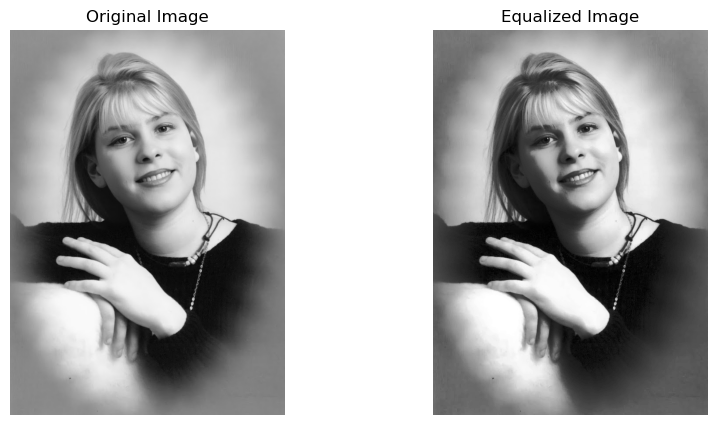

In [19]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply histogram equalization
equalized = cv2.equalizeHist(gray)

# Display the original and equalized images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB), cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.show()

This code will produce a plot showing the color distribution for each color channel (Red, Green, Blue) in the image. It will help visualize how different colors are distributed throughout the image.

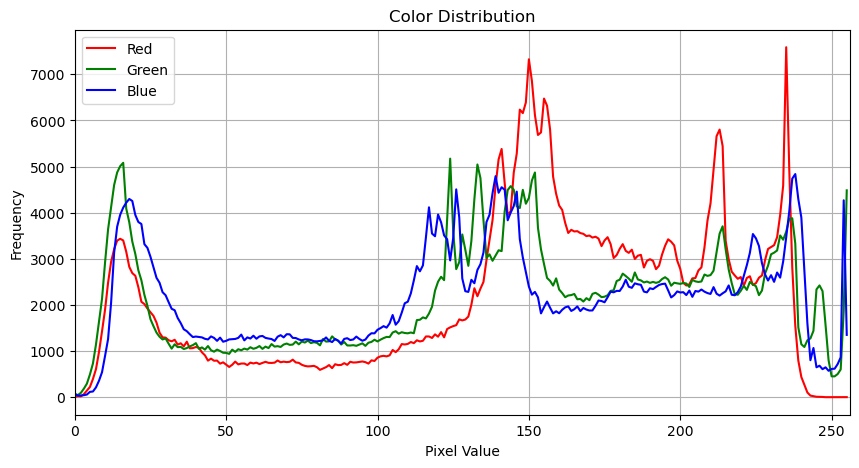

In [21]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its color channels
channels = cv2.split(image_rgb)

# Define colors for plotting
colors = ('r', 'g', 'b')

# Plot histograms for each color channel
plt.figure(figsize=(10, 5))
for channel, color in zip(channels, colors):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    plt.plot(hist, color=color)
    plt.xlim([0, 256])

plt.title('Color Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.legend(['Red', 'Green', 'Blue'])
plt.grid(True)
plt.show()

This code will print the histogram data matrix, where each row represents the histogram values for a specific pixel value (0 to 255) and each column represents the histogram values for the Red, Green, and Blue channels, respectively. You can further process or analyze this matrix as needed for your application.

In [22]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its color channels
channels = cv2.split(image_rgb)

# Initialize a matrix to store histogram data
hist_data = np.zeros((256, 3), dtype=int)

# Compute histograms for each color channel and store the data in the matrix
for i, channel in enumerate(channels):
    hist = cv2.calcHist([channel], [0], None, [256], [0, 256])
    hist_data[:, i] = hist[:, 0]

# Display the histogram data matrix
print("Histogram Data (Rows: Pixel Values, Columns: RGB Channels):")
print(hist_data)


Histogram Data (Rows: Pixel Values, Columns: RGB Channels):
[[   6   75   65]
 [  23   45   37]
 [  18   94   37]
 [  65  185   44]
 [ 142  294   58]
 [ 222  492  116]
 [ 395  731  124]
 [ 608 1142  213]
 [ 980 1641  357]
 [1429 2133  542]
 [1897 2919  894]
 [2483 3639 1261]
 [2934 4111 2052]
 [3210 4600 3133]
 [3394 4872 3697]
 [3434 5008 3955]
 [3398 5081 4110]
 [3153 4088 4216]
 [2825 3793 4297]
 [2690 3373 4253]
 [2632 3104 3950]
 [2384 2751 3798]
 [2069 2535 3754]
 [2018 2218 3317]
 [1922 1979 3237]
 [1843 1691 3044]
 [1762 1540 2817]
 [1617 1400 2588]
 [1399 1311 2481]
 [1298 1252 2276]
 [1292 1275 2211]
 [1235 1160 2060]
 [1212 1053 1917]
 [1245 1148 1885]
 [1141 1085 1717]
 [1169 1091 1606]
 [1102 1045 1473]
 [1204 1065 1432]
 [1059 1102 1365]
 [1065 1129 1304]
 [1088 1172 1315]
 [1073 1048 1305]
 [ 973 1079 1297]
 [ 908 1032 1266]
 [ 793 1110 1252]
 [ 836 1019 1318]
 [ 791  987 1286]
 [ 794 1032 1222]
 [ 728 1002 1292]
 [ 756  964 1203]
 [ 705  961 1222]
 [ 656  940 1253]
 [ 7

We have a neat matrix. Let's shoot some analysis to it.

## Color Distribution Analysis:
Color distribution analysis involves examining the frequency distribution of pixel values across different color channels in the image. This analysis provides insights into the overall distribution of colors, including the range of colors present and their relative frequencies.

For the Color Distribution Analysis, we'll calculate histograms for each color channel (Red, Green, Blue) and visualize them as separate plots. This will help us understand the frequency distribution of pixel values across different color channels in the image.

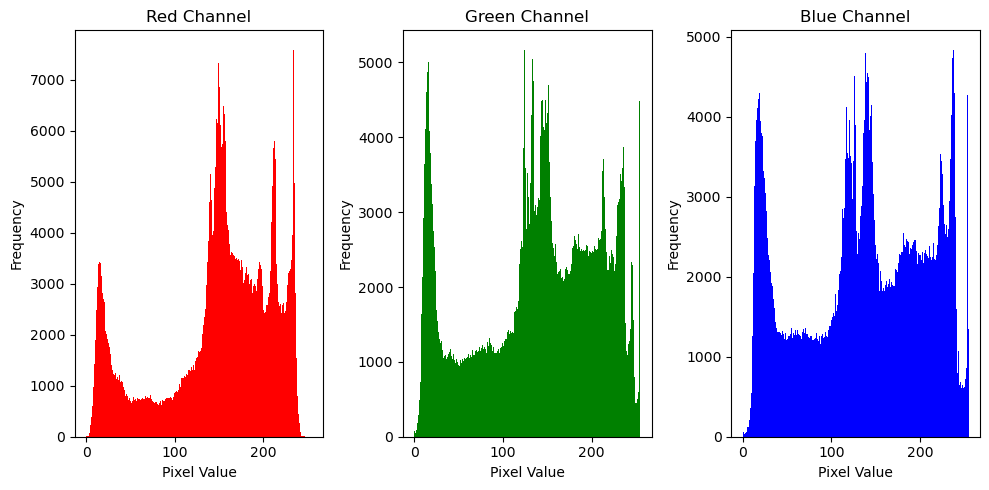

In [24]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its color channels
channels = cv2.split(image_rgb)

# Define colors for plotting
colors = ('r', 'g', 'b')
channel_names = ('Red', 'Green', 'Blue')

# Plot histograms for each color channel
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors), 1):
    plt.subplot(1, 3, i)
    plt.hist(channel.ravel(), bins=256, color=color)
    plt.title(channel_names[i - 1] + ' Channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Color Dominance:
Color dominance analysis aims to identify the dominant colors in the image by identifying peaks in the histogram data for each color channel. Dominant colors play a significant role in defining the visual appearance of an image and can be useful for tasks such as image categorization or branding.

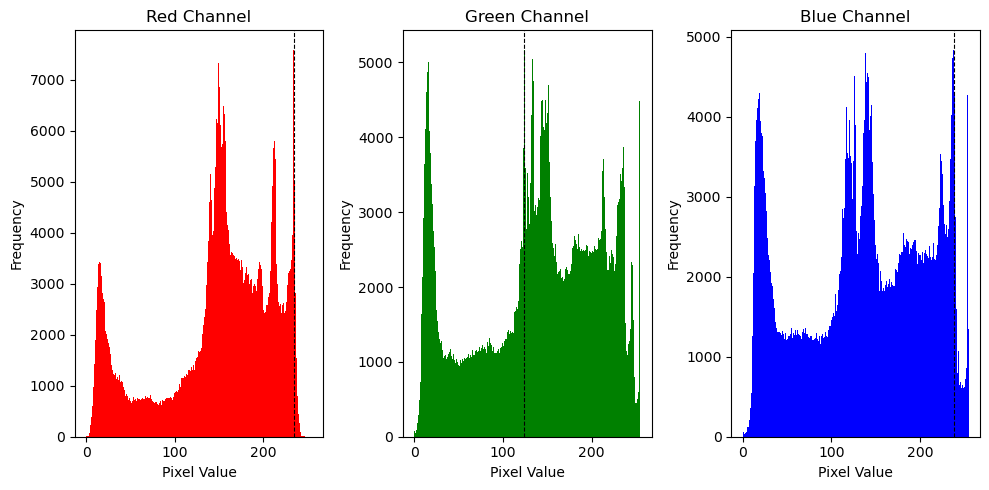

In [26]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its color channels
channels = cv2.split(image_rgb)

# Define colors for plotting
colors = ('r', 'g', 'b')
channel_names = ('Red', 'Green', 'Blue')

# Plot histograms for each color channel with dominant colors marked
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors), 1):
    # Compute histogram
    hist, bins = np.histogram(channel.flatten(), bins=256, range=[0,256])
    
    # Find peaks (dominant colors)
    peaks = np.where((hist > 0) & (hist == max(hist)))[0]
    
    # Plot histogram
    plt.subplot(1, 3, i)
    plt.hist(channel.ravel(), bins=256, color=color)
    plt.title(f'{channel_names[i - 1]} Channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    
    # Mark dominant colors on the histogram
    for peak in peaks:
        plt.axvline(x=peak, color='k', linestyle='--', linewidth=0.8, label='Dominant Color')

plt.tight_layout()
plt.show()

## Color Balance:
Color balance analysis evaluates the balance of colors in the image by comparing the histogram values across different color channels. A well-balanced image will have similar histogram values for all color channels, indicating a neutral color representation. An imbalance may suggest a color cast or bias, which could affect the overall visual quality of the image.

For Color Balance analysis, we'll compare the histogram values across different color channels to evaluate the balance of colors in the image. A well-balanced image will have similar histogram values for all color channels, indicating a neutral color representation. An imbalance may suggest a color cast or bias, which could affect the overall visual quality of the image.

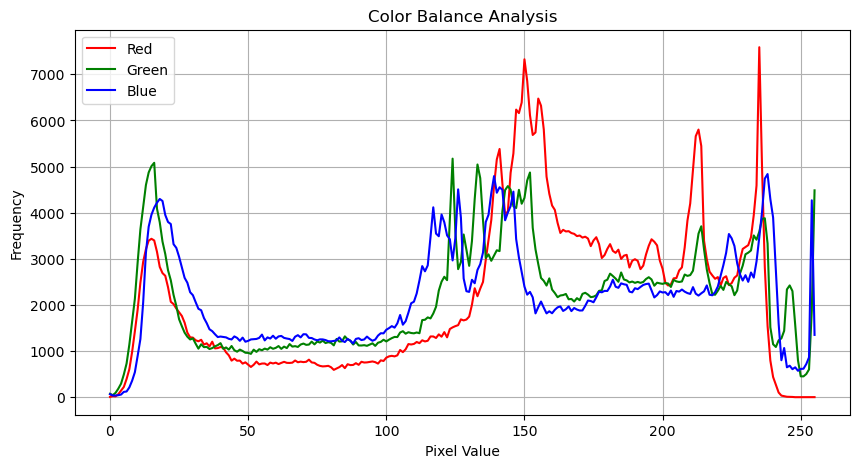

In [28]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its color channels
channels = cv2.split(image_rgb)

# Define colors for plotting
colors = ('r', 'g', 'b')
channel_names = ('Red', 'Green', 'Blue')

# Compute histograms for each color channel
histograms = [cv2.calcHist([channel], [0], None, [256], [0, 256]) for channel in channels]

# Plot histograms for each color channel
plt.figure(figsize=(10, 5))
for i, (hist, color) in enumerate(zip(histograms, colors), 1):
    plt.plot(hist, color=color)
    plt.title('Color Balance Analysis')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend(channel_names)

plt.grid(True)
plt.show()


## Contrast Enhancement
For Contrast Enhancement, we'll adjust the contrast of the image based on the histogram data. By stretching or equalizing the histogram values for specific color channels, we can enhance the contrast between different colors in the image, leading to improved visual clarity and detail.

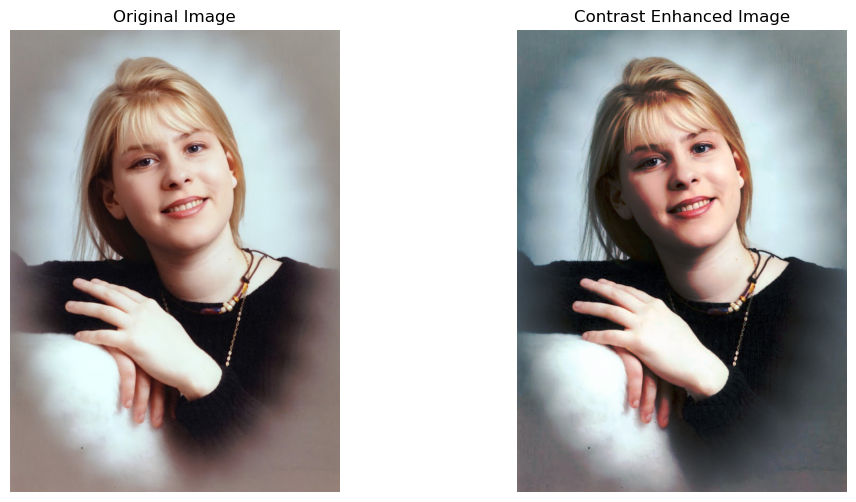

In [29]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply histogram equalization to each color channel separately
equalized_channels = [cv2.equalizeHist(channel) for channel in cv2.split(image_rgb)]

# Merge the equalized color channels back into an RGB image
equalized_image = cv2.merge(equalized_channels)

# Display the original and equalized images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image)
plt.title('Contrast Enhanced Image')
plt.axis('off')

plt.show()

## Color Space Transformation Analysis
For Color Space Transformation analysis, we'll convert the RGB histogram data to other color spaces such as HSV (Hue, Saturation, Value) or LAB (Lightness, A, B). This transformation allows us to analyze color characteristics such as hue, saturation, and brightness, which may provide additional insights into the color distribution of the image.

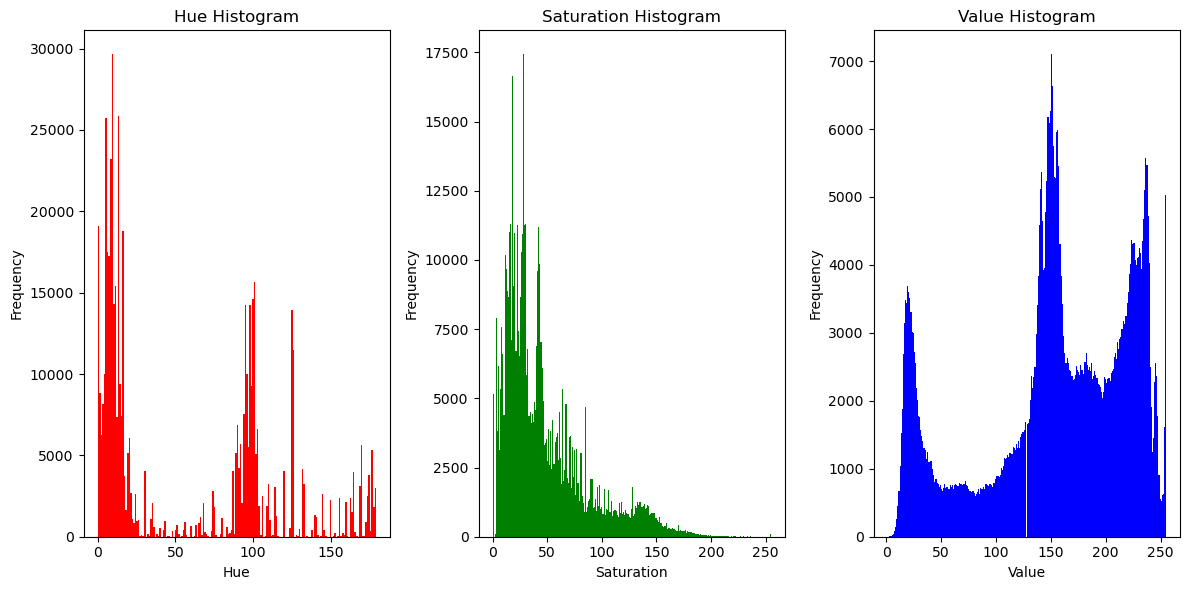

In [30]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert RGB image to HSV color space
image_hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)

# Split the HSV image into its individual channels
h, s, v = cv2.split(image_hsv)

# Plot histograms for each channel in HSV color space
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(h.flatten(), bins=180, color='r')
plt.title('Hue Histogram')
plt.xlabel('Hue')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(s.flatten(), bins=256, color='g')
plt.title('Saturation Histogram')
plt.xlabel('Saturation')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(v.flatten(), bins=256, color='b')
plt.title('Value Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In the code above:

    We read the image and convert it from BGR to RGB format using cv2.cvtColor().
    The RGB image is then converted to the HSV color space using cv2.cvtColor() with the conversion flag cv2.COLOR_RGB2HSV.
    We split the HSV image into its individual channels: Hue (H), Saturation (S), and Value (V).
    Histograms are plotted for each channel in the HSV color space, providing insights into the distribution of hue, saturation, and value components in the image.

This implementation allows us to analyze color characteristics such as hue, saturation, and brightness, providing additional insights into the color distribution of the image beyond the RGB color space.

## Color Distribution Analysis
For the Color Distribution Analysis, we'll calculate histograms for each color channel (Red, Green, Blue) and visualize them as separate plots. This will help us understand the frequency distribution of pixel values across different color channels in the image.

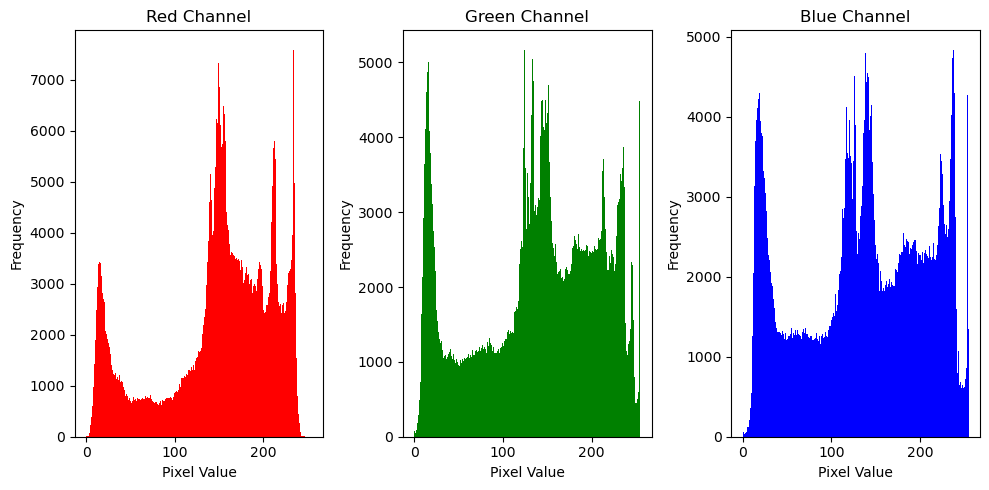

In [31]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its color channels
channels = cv2.split(image_rgb)

# Define colors for plotting
colors = ('r', 'g', 'b')
channel_names = ('Red', 'Green', 'Blue')

# Plot histograms for each color channel
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors), 1):
    plt.subplot(1, 3, i)
    plt.hist(channel.ravel(), bins=256, color=color)
    plt.title(channel_names[i - 1] + ' Channel')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Color Harmony Analysis
For Color Harmony Analysis, we'll examine the relationships between colors in the image by analyzing the co-occurrence of color combinations or patterns in the histogram data. Understanding color harmony can help assess the visual appeal and aesthetic quality of an image, as well as guide decisions in design and composition.

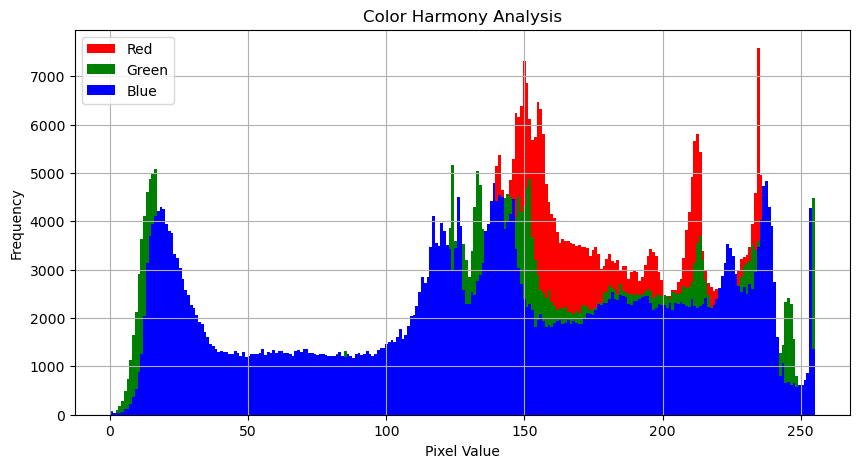

In [32]:
# Read the image
image = cv2.imread('images/RS.jpg')

# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into its color channels
channels = cv2.split(image_rgb)

# Define colors for plotting
colors = ('r', 'g', 'b')
channel_names = ('Red', 'Green', 'Blue')

# Plot histograms for each color channel
plt.figure(figsize=(10, 5))
for i, (channel, color) in enumerate(zip(channels, colors), 1):
    plt.hist(channel.ravel(), bins=256, color=color)
    plt.title('Color Harmony Analysis')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.legend(channel_names)

plt.grid(True)
plt.show()

## Color-Based Image Retrieval
For Color-Based Image Retrieval, we'll utilize the histogram data as features for content-based image retrieval systems. By comparing the histogram similarity between images, we can retrieve visually similar images based on color similarity. This analysis enables efficient searching and organization of image databases, particularly in applications where color plays a significant role in image content.

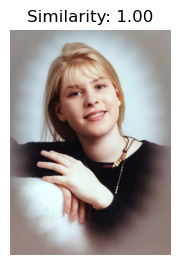

In [35]:
# Function to calculate histogram for an image
def calculate_histogram(image):
    hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist).flatten()
    return hist

# Function to calculate histogram similarity between two images
def histogram_similarity(hist1, hist2):
    return cv2.compareHist(hist1, hist2, cv2.HISTCMP_CORREL)

# Read the query image
query_image = cv2.imread('images/RS.jpg')

# Calculate histogram for the query image
query_hist = calculate_histogram(query_image)

# Define the directory containing the database images
database_dir = 'images/'

# Iterate over images in the database directory
similar_images = []
for filename in os.listdir(database_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Read the database image
        database_image = cv2.imread(os.path.join(database_dir, filename))
        
        # Calculate histogram for the database image
        database_hist = calculate_histogram(database_image)
        
        # Calculate histogram similarity between query image and database image
        similarity = histogram_similarity(query_hist, database_hist)
        
        # Append the filename and similarity score to the list of similar images
        similar_images.append((filename, similarity))

# Sort the list of similar images based on similarity score
similar_images.sort(key=lambda x: x[1], reverse=True)

# Display the top 5 most similar images
plt.figure(figsize=(12, 6))
for i, (filename, similarity) in enumerate(similar_images[:5], 1):
    image = cv2.imread(os.path.join(database_dir, filename))
    plt.subplot(1, 5, i)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'Similarity: {similarity:.2f}')
    plt.axis('off')

plt.show()


Note: Since I am analysing a single image, it is 100% similar to itself. In future iterations of this exploratory exercise I might load in different images with various levels of similarity, and then test the results with this method.